# Monte Carlo Study of Ferro-magnetism using an Ising Model


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hariseldon99/StatMechCodes/blob/master/Metrop_Ising.ipynb)

The goal of this simulation is to run a statistical model simulating the evolution of magnetism as a function of material temperature. 
Since the emergence of magnetism is attributed to the contribution of a great many small atomic magnetic dipoles a statistical method is to be utilised.



## The Ising model
In 1925, Ernst Ising introduced a model consisting of a lattice of $N$ “spin” variables $s_i$, which can only take the values $\pm 1$. Every spin interacts with its nearest neighbors as well as with an external magnetic field $h$[1]. The Hamiltonian of the Ising model for a particular configuration of spins $\left\{s_i\right\}$ is
$$
H(\left\{s_i\right\}) = -\sum_{\langle i, j\rangle} s_is_j - h\sum_{i}s_i,
$$
where $\langle i, j\rangle$ denote only nearest neighbour pairs, or 'bonds'. Note that the hopping $J$ is set to unity, and $h$ (now in units of $J$) is an external field that interacts with each spin. Now, when kept completely isolated from the environment, the system wants to go to its lowest energy ground state. In the limit $h\rightarrow 0+$, this is the state with all the spins at $+1$, and in the limit $h\rightarrow 0-$, this is the state with all the spins at $-1$. However, connecting the system to a temperature bath and waiting for it to transition to thermal equilibrium causes thermal excitations that take it away from this trajectory. If the temperature is very high, we expect thermalization to dominate and all the spins to randomize when $h\rightarrow 0$, leading to a average magnetization  $m\equiv N^{-1}\sum_i s_i \approx 0$. However, this system might allow for *spontaneous magnetization* at lower temperatures, where interacting pairs of spins 'co-operate' and align themselves parallel to each other even if the external field $h$ vanishes. The purpose of this simulation is to demonstrate that this happens in the Ising model at least in some cases. 

An exact simulation of the full dynamics of the Ising model to its thermal equilibrium state is computationally prohibitive, since this requires computing the trajectory of $N$ spins through a total of $2^N$ possible states, which is too large for even super-computers to handle beyond $N\sim 40$. Therefore, we will have to start from a random configuration of spins and simulate the transition to equilibrium stochastically. This is done via **Monte Carlo methods**.
The subject of of this project will be statistical in nature, and hence a basic understanding of Monte Carlo methods and random number algorithms will be necessary.

## Monte Carlo Methods and the Ising model
Numerical computations which utilise random numbers are called Monte Carlo methods after a famous gambling hotspot in Monaco that used as a code word to denote the method, (at the time, the method was a military secret) [2]. The obvious applications of such methods are in stochastic physics: e.g., statistical thermodynamics. However, there are other, less obvious, applications including the evaluation of multi-dimensional integrals. The modern version of the Monte Carlo method was invented in the late 1940s by Stanislaw Ulam, and heavily influenced by Enrico Fermi, John von Neumann and Nicholas Metropolis [2].

Instead of a general discussion of Monte Carlo methods, we shall restrict our attention to a specific kind of monte carlo method calle the **Metropolis Algorithm**[3]. The Metropolis algorithm is a simple and widely used approach to generate the canonical ensemble in statistical mechanics. It is especially convenient to explain (and to implement) for an Ising model. The algorithm has the following steps.

1. Start with some spin configuration $\left\{s_i\right\}$.
2. Randomly choose a spin $s_i$
3. Attempt to flip it, *i.e.* $s_i \rightarrow − s_i$ (trial).
4. Compute the energy change $\Delta E$ and magnetization change $\Delta m$ due to this flip. This calculation will only involve the nearest neighbour spins.
    * If $\Delta E \leq 0$, accept the trial.
    * If $\Delta E > $ 0, accept the trial with probability $p \sim \exp{\left(-\beta\Delta E\right)}$.
5. If trial is rejected, put the spin back, *i.e.*: $s_i \rightarrow − s_i$
6. The above steps constitute one 'epoch' in the Monte Carlo method, analogous to a single unit of time passed. Calculate thermodynamic quantities summed over all the degrees of freedom.
7. Keep repeating these epochs until the thermodynamic quantities appear to stabilize in an orbit. That will be the thermal equilibrium point.

To see why this algorithm will cause the system to attain thermal equilibrium in a canonical ensemble, consider that this simulation follows a Markov Chain, which is completely specified by a transition probability matrix $\pi_{AB}$ — the probability of jumping to state B with a single spin-flip if the current state is A. During the runtime of the algorithm, a spin flip change with decreasing energy is always accepted, since this is a natural transition to the ground state. However, a spin flip with an increase energy is only accepted with probability $\exp{(-\beta\Delta E)}$, since this process is supposed to simulate the stochastic addition of thermal  energy from a bath at constant temperature $T=1/k_B\beta$. Consider any two states $A$ and $B$ such that $E_B > E_A$. If the acceptance probabilities  for a transition from state $A$ to state $B$ is $p^{acc}_{AB}$, then $\pi_{AB} \sim p^{acc}_{AB}$, and $\pi_{BA}\sim p^{acc}_{BA} $. Now, when the system is in equilibrium, we expect the principle of **detailed balance** to hold, where the probability from going from state $A$ to $B$ is the same as the probability of the reverse process *i.e.* going from $B$ to $A$ [3]. This way, all $A\rightarrow B$ transitions in an equilibrium orbit of the Metropolis dynamics cancel out with $B\rightarrow A$ transitions. Thus, at equilibrium,
$$
p_{A\rightarrow B} = p_A \pi_{AB} = p_{B\rightarrow A} = p_B\pi_{BA},
$$
where $p_{A,B}$ are the equilibrium probabilities of states $A$ and $B$ independently. Thus, 
$$
\frac{p_A}{p_B} = \frac{\pi_{BA}}{\pi_{AB}} = \frac{p^{acc}_{BA}}{p^{acc}_{AB}}.
$$
Finally, if our numerical algorithm chooses $p^{acc}_{AB} \sim e^{\beta\left(E_A - E_B\right)}$ and $p^{acc}_{BA} = 1$, then 
$$
\frac{p_A}{p_B} = \frac{1}{p^{acc}_{AB}} = e^{-\beta\left(E_A - E_B\right)} = \frac{e^{-\beta E_A}}{e^{-\beta E_B}}
$$
for all pairs of states $A$ and $B$. Therefore, $p_r\sim \exp{\left(-\beta E_r\right)}$ for any state $r$, which is the canonical ensemble.

## Numerical Implementation
The code cell below executes the Metropolis algorithm of the $1-$ and $2-$ dimensional Ising models. Instead of re-inventing the wheel, so to speak, we shall use a python routine designed by Hammel [4] after modifying it a little. The original source code [4] builds the Ising system and runs the monte carlo algorithm for $X$ monte carlo steps (referred to as 'epochs'). The basic code is just a loop, as represented in pseudocode below.


    system = build_system()

    for _ in range(epochs):

        N, M = generate_random_coordinate_location()

        E = calculate_energy_of_fliped_spin()
    
        if E <= 0.:     # Then this is a more probable state, flip the spin
            system[N,M] *= -1
        elif np.exp(-1./T*E) > np.random.rand():    # Still a possbile state, roll the dice
            system[N,M] *= -1
            
While the original code was designed for $2-$dimensional lattices only, we have added small modifications to handle both $1-$ and $2-$dimensional lattices, as well as animate the results. 

The algorithm can be initialized with any initial state that is a numpy multidimensional array [5] with strictly $2$ axes (dimensions) of size $\mbox{ rows } \times \mbox{ columns}$. You can also simulate a $1-d$ system of size '$n$' by initializing it with a $2-$dimensional array of size $1\times n$ or $n \times 1$. Note that periodic boundary conditions are consistently kept by subclassing the numpy array with a new 'Periodic_array' class and overloading the operators (in the python sense) [6]. We have used an existing implementation of this, called 'Periodic\_Lattice' [7] which is called internally.

Here are some basic instructions for preparing and running the simulation.

* Run the code cell below to define all the functions and classes required for the simulation to run.

* In another code cell, initiate an "IsingLattice" object with some simulation parameters. An example is shown here:

        #Simulation Parameters

        lattice_shape = (1,50)

        #Maximum number of monte carlo steps
        maxtime = 50

        #External field
        h = 0.0
        temp = 1e-2

        #Initial Condition (random)
        ic = np.random.choice([-1, 1], size = lattice_shape)

        #Initiate the Ising system with the parameters above
        l = IsingLattice(initial_state=ic, temperature=temp, field=h, max_epochs=maxtime)



* To run the actual Metropolis algorithm, import a matplotlib plotter [8], take the IsingLattice object and pass them to the runtime function. An example is shown below:

        import matplotlib.pyplot as plt
        ani = ising_run(l, plt,video=False)



* As the simulation runs, it will show a progress bar at the bottom. Wait until the simulation finishes.

* If you run the simulation with the 'video' keyword argument set to 'False', it will return 'None' (so 'ani= None') and store the results in methods and variable fields in the IsingLattice object. The results are
    1. The final magnetization - average and fluctuations and final energy of the system - average and fluctuations: Can be retrieved in the example above with
            
            m, mfluc = l.magnetization
            e, efluc = l.internal_energy    

    2. The entire Metopolis dynamics (instantaneous) of the quantities mentioned above can also be accessed from the IsingLattice object. They are storedas numpy arrays as values of keys in a dictionary variable field in the IsingLattice object, and can be retrieved in the example above by:
    
            dynamics_dict = l.epochdata
        

* Alternatively, the simulation can be told to animate the results in a video. The video is a matplotlib animation and can be rendered in different ways, consult the matplotlib documentation for details [9]. In the example above, run 'ising_run' with the video keywork argument set to 'True'. It will return the animation to the 'ani' variable.

            import matplotlib.pyplot as plt
            ani = ising_run(l, plt,video=True)
            
            
* Additional keyword arguments can be used to control the matplotlib figure being animated, for instance, 'figsize', 'aspect' etc.
   
* If needed for something else, the generator for the Metropolis iterator can be accessed as a method in the IsilgLattice object, for instance, in the example above, appending

            mgen = l.metrop_gen
            
            for l in l.metrop_gen:
                print(l.system)


   will create a generator, allowing you to loop over the metropolis cycles and print out the state at each update.

## **Please Note**
The Metropolis algorithm is not very accurate near $T=0$. At sufficiently small $T$, the acceptance probability of an $A\rightarrow B$ transition that increases in energy, $p^{acc}_{AB}\sim e^{-|\Delta E_{AB}|/k_BT}$ , is exponentially low, so underflow in the floating point arithmetic effectively sets it to $0$. Therefore, the simulation simply moves the lattice along a trajectory of decreasing energy until it reaches the fully magnetized ground state. As you know from theoretical descriptions [1], this contradicts the exact results for finite sized systems, or for $1-$dimensional models, at nonzero temperature, none of which show sponteneous magnetization. Therefore, this spurious behaviour, observed in simulation, is an artifact of the algorithm.

## References

1. Ising E. (1925), Z. Physik, **31**, 253 ; Also see Reichl, L. E. (2016), *A Modern Course in Statistical Physics*,  Wiley.

2. Metropolis, N. (1987). ["The beginning of the Monte Carlo method"](https://dasher.wustl.edu/chem478/reading/lascience-14-125-87.pdf). Los Alamos Science (1987 Special Issue dedicated to Stanislaw Ulam): 125–130.

3. Newman M. E. J., and Barkema G. T. (1999), *Monte Carlo Methods in Statistical Physics*, Clarendon Press.

4. Hammel B. D. (2017). [The Ising model](http://www.bdhammel.com/ising-model/), *[bdhammel.com](http://www.bdhammel.com/)*, June 10, 2017. Source code @ [GitHub](https://github.com/bdhammel/ising-model)

5. For a quick introduction to numpy arrays, see the [NumPy quickstart tutorial](https://numpy.org/doc/stable/user/quickstart.html).

6. The guide for subclassing numpy arrays can be found in "[Subclassing ndarray
](https://numpy.org/doc/stable/user/basics.subclassing.html)".

7. McFarlane, A (2016). [Periodic Boundary Conditions for Lattices in Python](https://flipdazed.github.io/blog/python/periodic-boundary-conditions), *[flipdazed.github.io](https://flipdazed.github.io/)*, Sept 20, 2016.

8. For a quick introduction to matplotlib, see [Matplotlib Usage Guide](https://matplotlib.org/tutorials/introductory/usage.html).

9. Matplotlib Animation Documentation: [matplotlib.animation](https://matplotlib.org/3.2.1/api/animation_api.html); For quick tutorials, see Hughes, K (2016). [Matplotlib animations the easy way](https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/), *[brushingupscience.com](https://brushingupscience.com)*, June 21, 2016. Pandey, P (2019), [Animations with Matplotlib](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c), *[Towards Data Science](https://towardsdatascience.com/)*, April 14, 2019.

<!-- https://share.cocalc.com/share/bb76377ee6823f7155a629e6f072f30d7c0b956f/Project_IsingModel/Project_IsingModel.ipynb?viewer=share  -->

## Python codes
Below are the python codes for running the metropolis algorithm for the ising model. You can run them by clicking on each code cell and pressing 'Ctrl - Enter' or copying them into a separate python file and passing the file to a python interpreter. Note that they are coded in python version 3.6.9. I have not tested them in python2.

### **Please Note**:

1. When the video of the metropolis animation is rendered by jupyter's javascript-html5 library, a bug causes an extra frame of the video to appear as a figure below the video. This problem does not occur if the code is run in regular python. Please ignore the extra figure below the video.

2. If you run the simulation with video on, the animation rendering might be very slow, especially for long epochs. In that case, run the simulation without video and plot the results as shown in the examples below.

3. There is a problem with the Metropolis algorithm that can make it unreliable even for long epochs if you're at a temperature near $T_c$. This is due to a phenomenon called 'critical slowing down'. The existence of critical slowing down is related to the fact that the size of the correlated regions of spins becomes very large near the critical point, and hence the time required for a region to lose its coherence becomes very long if a local dynamics is used. If we are interested only in the static properties of the Ising model, we can modify the metropolis algorithm to the Wolff algorithm. This algorit m flips a cluster of spins rather than a single spin, and is an example of a global algorithm. I plan to make modifications to include this in future versions of this exercise. For now, **simply avoid temperatures close to criticality** in the simulation exercises.

### Define all functions
Run the code cell below to define all classes and functions. Extra packages also might be installed, if needed.

In [1]:
"""
Created on Sun May  3 21:01:27 2020

@author: daneel
"""
# Changes by A. Roy @ https://github.com/StatMechCodes/Metrop_Ising.ipynb
import numpy as np
import matplotlib.animation as anim
import matplotlib.pyplot as plt
from tqdm import tqdm

#Credited to Alex McFarlane @ https://flipdazed.github.io/
class Periodic_Lattice(np.ndarray):
    """Creates an n-dimensional ring that joins on boundaries w/ numpy
    
    Required Inputs
        array :: np.array :: n-dim numpy array to use wrap with
    
    Only currently supports single point selections wrapped around the boundary
    """
    def __new__(cls, input_array, lattice_spacing=None):
        """__new__ is called by numpy when and explicit constructor is used:
        obj = MySubClass(params) otherwise we must rely on __array_finalize
         """
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        
        # add the new attribute to the created instance
        obj.lattice_shape = input_array.shape
        obj.lattice_dim = len(input_array.shape)
        obj.lattice_spacing = lattice_spacing
        
        # Finally, we must return the newly created object:
        return obj
    
    def __getitem__(self, index):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__getitem__(index)
    
    def __setitem__(self, index, item):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__setitem__(index, item)
    
    def __array_finalize__(self, obj):
        """ ndarray.__new__ passes __array_finalize__ the new object, 
        of our own class (self) as well as the object from which the view has
        been taken (obj). 
        """
        # ``self`` is a new object resulting from
        # ndarray.__new__(Periodic_Lattice, ...), therefore it only has
        # attributes that the ndarray.__new__ constructor gave it -
        # i.e. those of a standard ndarray.
        #
        # We could have got to the ndarray.__new__ call in 3 ways:
        # From an explicit constructor - e.g. Periodic_Lattice():
        #   1. obj is None
        #       (we're in the middle of the Periodic_Lattice.__new__
        #       constructor, and self.info will be set when we return to
        #       Periodic_Lattice.__new__)
        if obj is None: return
        #   2. From view casting - e.g arr.view(Periodic_Lattice):
        #       obj is arr
        #       (type(obj) can be Periodic_Lattice)
        #   3. From new-from-template - e.g lattice[:3]
        #       type(obj) is Periodic_Lattice
        # 
        # Note that it is here, rather than in the __new__ method,
        # that we set the default value for 'spacing', because this
        # method sees all creation of default objects - with the
        # Periodic_Lattice.__new__ constructor, but also with
        # arr.view(Periodic_Lattice).
        #
        # These are in effect the default values from these operations
        self.lattice_shape = getattr(obj, 'lattice_shape', obj.shape)
        self.lattice_dim = getattr(obj, 'lattice_dim', len(obj.shape))
        self.lattice_spacing = getattr(obj, 'lattice_spacing', None)
        pass
    
    def latticeWrapIdx(self, index):
        """returns periodic lattice index 
        for a given iterable index
        
        Required Inputs:
            index :: iterable :: one integer for each axis
        
        This is NOT compatible with slicing
        """
        if not hasattr(index, '__iter__'): return index         # handle integer slices
        if len(index) != len(self.lattice_shape): return index  # must reference a scalar
        if any(type(i) == slice for i in index): return index   # slices not supported
        if len(index) == len(self.lattice_shape):               # periodic indexing of scalars
            mod_index = tuple(( (i%s + s)%s for i,s in zip(index, self.lattice_shape)))
            return mod_index
        raise ValueError('Unexpected index: {}'.format(index))

        
# Original code by B.D. Hammel @ https://github.com/bdhammel/ising-model
class IsingLattice:

    def __init__(self, temperature=1.0,\
                 field=0.0,\
                 max_epochs=10,\
                 initial_state=np.random.choice([-1, 1], size = (4,4))):
        """Build the system from an initial state
        Build either a randomly distributed system or a homogeneous system (for
        watching the deterioration of magnetization
        Parameters
        ----------
        temperature   : Provided in units where k_B = J = 1. Default = 1
        field         : External field in units of J. Default = 0.
        max_epochs    : The maximum number of monte carlo steps. Default = 100
        initial_state : numpy array with two axes. Any size or shape will do.
                        For 1d problems, choose a shape of (1,N) or (N,1). 
                        Default = random 4X4
        """
        if initial_state.ndim != 2:
            raise ValueError("Currently only 2d arrays (of any shape) are supported.\
                            For For 1d problems, choose a shape of (1,N) or (N,1)")
        self.shape = initial_state.shape
        self.rows, self.cols = self.shape
        self.graph = np.meshgrid(np.arange(self.rows), np.arange(self.cols))
        self.size = np.prod(self.shape)
        self.T = temperature
        self.h = field
        self.max_epochs = max_epochs
        self.system = Periodic_Lattice(initial_state)
        #Initialize all thermodynamic data as functions of epoch (time) with blank lists
        self.epochdata = {"epochs":[], "mags":[], "chis":[], "energies":[], "cvs":[]}
            

    def local_energy_spins(self, N, M):
        """Calculate the energy of spin interaction at a given lattice site
        i.e. the interaction of a Spin at lattice site n,m with its 4 neighbors
        - S_n,m * (S_n+1,m + Sn-1,m + S_n,m-1, + S_n,m+1 )
        Note that, for a 1d lattice, the interaction changes to
        - S_1,m * (S_1,m+1 + S_1, m-1 ), or
        - S_m,1 * (S_m+1, 1 + S_m-1,1)
        Parameters
        ----------
        N : int
            lattice site coordinate
        M : int
            lattice site coordinate
        Return
        ------
        float
            energy of the site
        """
        rows, cols = self.shape
        if rows == 1:
            e = - self.system[N,M] * (self.system[N, M+1] + self.system[N, M-1] )
        elif cols == 1:
            e = - self.system[N,M] * (self.system[N+1, M] + self.system[N-1, M])
        else:
            e = - self.system[N, M]*(
            self.system[N - 1, M] + self.system[N + 1, M]
            + self.system[N, M - 1] + self.system[N, M + 1]
        )
        return e
    
    def local_energy_field(self, N, M):
        """Calculate the energy of field interaction at a given lattice site
        i.e. -S_nm * h
        Parameters
        ----------
        N : int
            lattice site coordinate
        M : int
            lattice site coordinate
        Return
        ------
        float
            energy of the site
        """
        return - self.system[N,M] * self.h

    def energy(self, N, M):
        """Calculate the energy at a given lattice site
        Parameters
        ----------
        N : int
            lattice site coordinate
        M : int
            lattice site coordinate
        Return
        ------
        float
            energy of the site
        """
        return self.local_energy_spins(N,M) + self.local_energy_field(N,M)
        
    @property
    def internal_energy(self):
        i, j = self.graph
        #The 0.5 is to offset for double counting the bonds during summation
        energies = 0.5 * self.local_energy_spins(i,j) +\
                                                self.local_energy_field(i,j)
        U = np.sum(energies.flatten())/self.size
        U_2 =  np.sum(energies.flatten()**2)/self.size
        return U, U_2

    @property
    def magnetization(self):
        """Find the average magnetization of the system
           Find the average mag^2 of the system also
        """
        m = np.sum(self.system)/self.size
        m_2 = np.sum(self.system**2)/self.size
        return m, m_2

    def metrop_gen(self):
        """Yield a generator for the metropolis simulation
        """
        for epoch in tqdm(np.arange(self.max_epochs)):
            # Randomly select a site on the lattice
            N, M = [np.random.randint(0, high=ndim) for ndim in self.shape]

            # Calculate energy of a flipped spin
            E = -1*self.energy(N, M)

            # "Roll the dice" to see if the spin is flipped
            if E <= 0.:
                self.system[N, M] *= -1
            elif np.exp(-E/self.T) > np.random.rand():
                self.system[N, M] *= -1
            #Calculate thermodynamic quantities
            m, msq = self.magnetization
            e, esq = self.internal_energy
            t = self.T
            n = self.size
            tsq = t * t
            nsq = n * n
            x = (msq - m*m)/(t * n)
            cv = (esq-e*e)/(tsq * nsq)

            #Update epochdata dict
            self.epochdata["epochs"].append(epoch)
            self.epochdata["mags"].append(m)
            self.epochdata["chis"].append(x)
            self.epochdata["energies"].append(e)
            self.epochdata["cvs"].append(cv)
            yield self 

            


def ising_video(lattice, plotter):
    """Prepare one frame of video for ising model simulation
    """
    #Get thermodynamics from continuously updated epochdata dict
    t = lattice.epochdata["epochs"]
    mags = lattice.epochdata["mags"]
    chis = lattice.epochdata["chis"]
    energies = lattice.epochdata["energies"]
    cvs = lattice.epochdata["cvs"]
    
    #Clear the plot of the previous frame and replot
    plotter.clf()
    # Get the figure and gridspec
    fig3 = plotter.gcf()
    grid = fig3.add_gridspec(4, 2)

    #Plot lattice on this axis
    lattice_ax = fig3.add_subplot(grid[0:,0])
    lattice_ax.set_title("T=%2.2lf, h=%2.2lf, size = %d" % (lattice.T,\
                                                           lattice.h,\
                                                           lattice.size))
    lattice_ax.axes.get_xaxis().set_visible(False)
    lattice_ax.axes.get_yaxis().set_visible(False)
    lattice_ax.imshow(lattice.system)

    #Plot thermodynamic quantities on these axes
    #Note that we're plotting time averages uptp the instant 
    mags_ax = fig3.add_subplot(grid[0,1])
    if  mags:
        mags_ax.set_title("m = %1.4lf" % np.average(mags))
        mags_ax.axes.get_xaxis().set_visible(False)
        mags_ax.plot(t, np.cumsum(mags)/np.arange(1,1+len(mags)))
            
    x_ax = fig3.add_subplot(grid[1,1])
    if  chis:    
        x_ax.set_title("X = %1.4lf" % np.average(chis))
        x_ax.axes.get_xaxis().set_visible(False)
        x_ax.plot(t, np.cumsum(chis)/np.arange(1,1+len(chis)))

    energy_ax = fig3.add_subplot(grid[2,1])    
    if  energies:
        energy_ax.set_title("e = %1.4lf" % np.average(energies))
        energy_ax.axes.get_xaxis().set_visible(False)
        energy_ax.plot(t, np.cumsum(energies)/np.arange(1,1+len(energies)))

    cv_ax = fig3.add_subplot(grid[3,1])    
    if  cvs:    
        cv_ax.set_title("Cv = %1.4lf" % np.average(cvs))
        cv_ax.set_xlabel("t (mc steps)")
        cv_ax.plot(t, np.cumsum(cvs)/np.arange(1,1+len(cvs)))


def ising_run(lattice, plotter,video=True, video_frate=60, **kwargs):
    """
    Runs the actual metropolis algorithm
    Parameters
        ----------
        Arguments:
        
        lattice     : IsingLattice object
        plotter     : matplotlib pyplot bject or figure
        
        Keywords:
        
        video       : Boolean for showing video of simulation, Default is True
        video_frate : Video frame rate in fps (frames per second), Default is 60
        
        Additional keyword arguments are passed to the matplotlib figure. 
        See their documentation for details.
    
        Return
        ------
        If video=False, then returns None
        Otherwise, it returns a matplotlib.animation object
        """
    if video:
        ani = anim.FuncAnimation(plotter.figure(**kwargs), ising_video, \
                                 frames=lattice.metrop_gen,\
                                 interval=1e3/video_frate,\
                                 fargs=(plotter,), save_count=lattice.max_epochs, repeat=False)
    else:
        ani = None
        #This runs the lattice metropolis generator
        for lattice in lattice.metrop_gen():
            pass
    return ani

if __name__ == '__main__':
    print("DONE!")

DONE!


Once the functions and classes above have been defined, an IsingLattice object can be instantiated with the parameters of interest and the simulation run with the relevant function or method. Some examples are given below


### Ising model in 1d (without video)

Run the code in the cell below to simulate the Ising model in 1d without video. You may change the size of fonts and figure as indicated in the comments below. The simulation parameters are

1. The lattice shape, which is set here to $(1,100)$.

2. The maximum 'time' (epochs) of the Metropolis Algorithm, which is set here to $10^5$.

3. The external field 'h', which is set here to $10^{-2}$ (in units of $J$).

4. The temperature, which is set to $1.5$ (in units of $J/k_B$).

Note that, at all finite temperatures, the zero-field magnetization pretty much equilibriates to $0$, consistent with the lack of spontaneous magnetization at finite temperatures.

100%|██████████| 100000/100000 [00:20<00:00, 4931.89it/s]


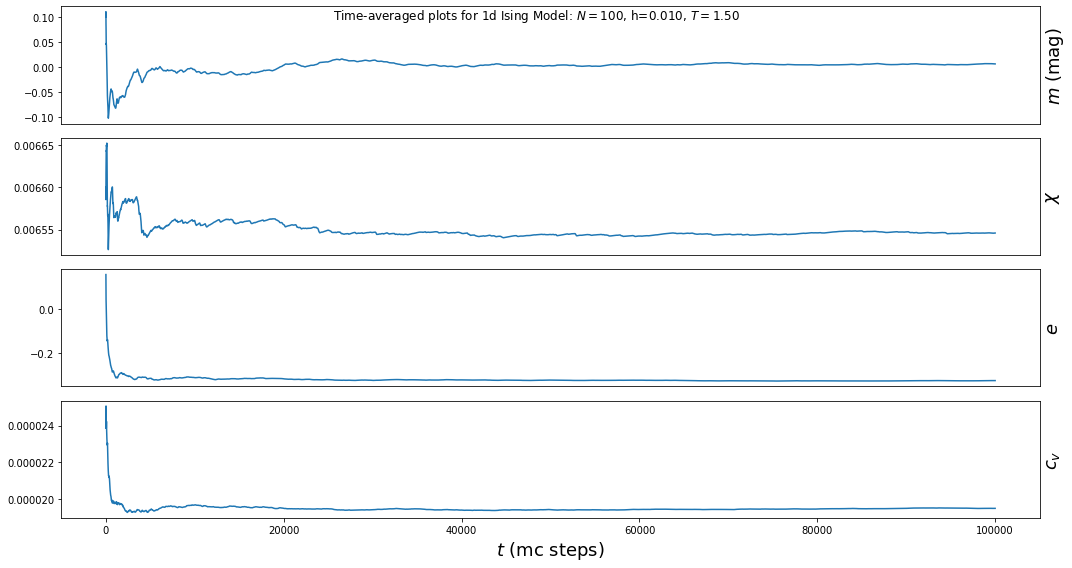

In [3]:
import matplotlib.pyplot as plt
#Simulation Parameters
lattice_shape = (1, 100)
maxtime = 100000
h = 0.01
temp = 1.5

#Initial Condition (random)
ic = np.random.choice([-1, 1], size = lattice_shape)

#Initiate the Ising system with the parameters above
l = IsingLattice(initial_state=ic, temperature=temp, field=h, max_epochs=maxtime)

#Run and display the Ising animation
ani = ising_run(l, None,video=False);

times = l.epochdata["epochs"]
mags = l.epochdata["mags"]
chis = l.epochdata["chis"]
energies = l.epochdata["energies"]
cvs = l.epochdata["cvs"]

#Plot thermodynamic quantities on these axes
#Size of fonts
fs = 18
plt.rcParams.update({'axes.titlesize': fs})
plt.rcParams.update({'axes.labelsize':fs})

#Size of figure
plt.rcParams.update({'figure.figsize':(15,8)})
plt.rcParams.update({'figure.autolayout':True})
fig, axs = plt.subplots(4)
fig.suptitle(r"Time-averaged plots for $1$d Ising Model: $N=%d$, h=$%1.3lf$, $T=%1.2lf$" % (lattice_shape[1], h, temp))

for ax in axs:
    ax.axes.get_xaxis().set_visible(False)
    ax.ticklabel_format(style='sci',axis='both')
    ax.yaxis.set_label_position("right")
    #ax.yaxis.tick_right()

#Note that we're plotting cumulative time averages
axs[0].set_ylabel(r"$m$ (mag)")
axs[0].plot(times, np.cumsum(mags)/np.arange(1,1+len(mags)))

axs[1].plot(times, np.cumsum(chis)/np.arange(1,1+len(chis)))
axs[1].set_ylabel(r"$\chi$")

axs[2].plot(times,  np.cumsum(energies)/np.arange(1,1+len(energies)))
axs[2].set_ylabel(r"$e$")

axs[3].plot(times, np.cumsum(cvs)/np.arange(1,1+len(cvs)))
axs[3].set_ylabel(r"$c_v$")
axs[3].set_xlabel(r"$t$ (mc steps)")
axs[3].axes.get_xaxis().set_visible(True)

### Ising model in 1d (with video)

Run the code in the cell below to simulate the Ising model in 1d with video. Note that this will be much slower then the previous case, since the video is generated frame by frame. You may change the size of fonts and figure as indicated in the comments below. The simulation parameters are

1. The lattice shape, which is set here to $(1,100)$.

2. The maximum 'time' (epochs) of the Metropolis Algorithm, which is set here to $30,000$.

3. The external field 'h', which is set here to $10^{-2}$ (in units of $J$).

4. The temperature, which is set to $1.0$ (in units of $J/k_B$).

In [ ]:
%matplotlib inline
from IPython.display import HTML
import matplotlib.pyplot as plt

#Size of fonts
fs = 20
plt.rcParams.update({'axes.titlesize': fs})
plt.rcParams.update({'axes.labelsize':fs})

#Size of figure
plt.rcParams.update({'figure.figsize':(15,8)})
plt.rcParams.update({'figure.autolayout':True})

#Simulation Parameters
lattice_shape = (1, 100)
maxtime = 30000
h = 0.01
temp = 1.0

#Initial Condition (random)
ic = np.random.choice([-1, 1], size = lattice_shape)

#Initiate the Ising system with the parameters above
l = IsingLattice(initial_state=ic,\
                 temperature=temp,\
                 field=h, max_epochs=maxtime)

#Run and display the Ising animation
ani = ising_run(l,plt,video=True)
HTML(ani.to_jshtml(default_mode="once")) 

### Ising model in 2d (without video)

Run the code in the cell below to simulate the Ising model in 2d without video. You may change the size of fonts and figure as indicated in the comments below. The simulation parameters are

1. The lattice shape, which is set here to $(20,20)$.

2. The maximum 'time' (epochs) of the Metropolis Algorithm, which is set here to $1\times 10^5$.

3. The external field 'h', which is set here to $0.01$.

4. The temperature, which is set to $1.0$ (in units of $J/k_B$).

The final video has two panels. The left panel shows a video representation of the Ising lattice, with square cells for lattice sites and alternating colours for the $\pm 1$ spin values. The right panel shows graphs of the magnetization (per site), magnetic susceptibility, total energy (also per site) and specific heat, evolving with time. Note the presence of spontaneous magnetization at $T=1$, clearly indicating that there is a $T_c > 1$. The small susceptibility indicates that we are still far from $T_c$, where it will be large.

100%|██████████| 100000/100000 [00:31<00:00, 3134.99it/s]


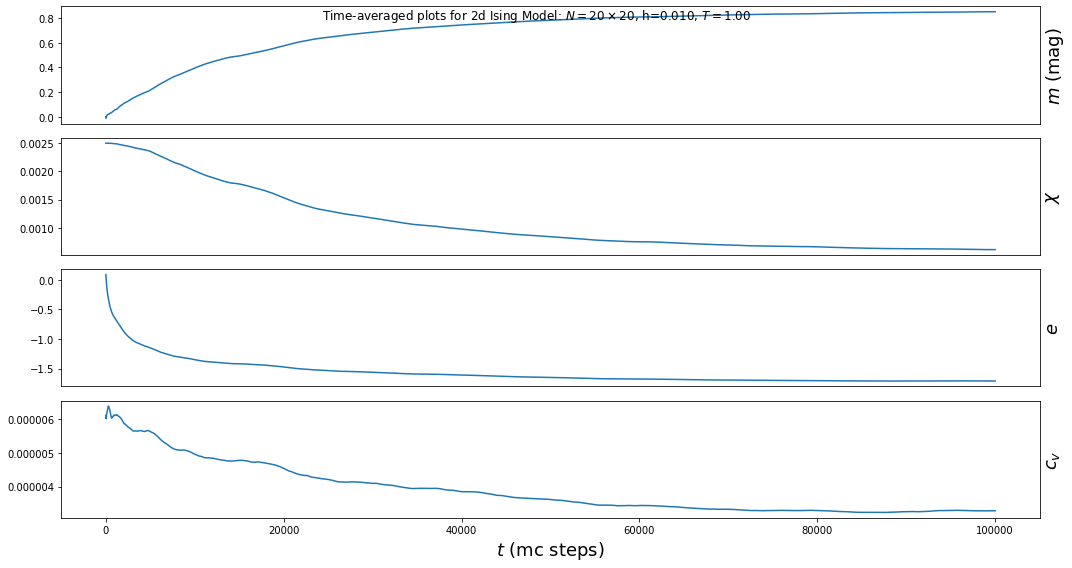

In [9]:
import matplotlib.pyplot as plt
#Simulation Parameters
lattice_shape = (20,20)
maxtime = 1e5
h = 0.01
temp = 1.0

#Initial Condition (random)
ic = np.random.choice([-1, 1], size = lattice_shape)

#Initiate the Ising system with the parameters above
l = IsingLattice(initial_state=ic, temperature=temp, field=h, max_epochs=maxtime)

#Run and display the Ising animation
ani = ising_run(l, None,video=False);

times = l.epochdata["epochs"]
mags = l.epochdata["mags"]
chis = l.epochdata["chis"]
energies = l.epochdata["energies"]
cvs = l.epochdata["cvs"]

#Plot thermodynamic quantities on these axes
#Size of fonts
fs = 18
plt.rcParams.update({'axes.titlesize': fs})
plt.rcParams.update({'axes.labelsize':fs})

#Size of figure
plt.rcParams.update({'figure.figsize':(15,8)})
plt.rcParams.update({'figure.autolayout':True})

fig, axs = plt.subplots(4)
fig.suptitle(r"Time-averaged plots for $2$d Ising Model: $N=%d \times %d$, h=$%1.3lf$, $T=%1.2lf$"\
                                                         % (lattice_shape[0],lattice_shape[1], h, temp))
for ax in axs:
    ax.axes.get_xaxis().set_visible(False)
    ax.ticklabel_format(style='sci',axis='both')
    ax.yaxis.set_label_position("right")
    #ax.yaxis.tick_right()

#Note that we're plotting cumulative time averages
axs[0].set_ylabel(r"$m$ (mag)")
axs[0].plot(times, np.cumsum(mags)/np.arange(1,1+len(mags)))

axs[1].plot(times, np.cumsum(chis)/np.arange(1,1+len(chis)))
axs[1].set_ylabel(r"$\chi$")

axs[2].plot(times,  np.cumsum(energies)/np.arange(1,1+len(energies)))
axs[2].set_ylabel(r"$e$")

axs[3].plot(times, np.cumsum(cvs)/np.arange(1,1+len(cvs)))
axs[3].set_ylabel(r"$c_v$")
axs[3].set_xlabel(r"$t$ (mc steps)")
axs[3].axes.get_xaxis().set_visible(True)

### Ising model in 2d (with video)

Run the code in the cell below to simulate the Ising model in 2d with video. This will run *really slowly*. You may change the size of fonts and figure as indicated in the comments below. The simulation parameters are

1. The lattice shape, which is set here to $(10,10)$.

2. The maximum 'time' (epochs) of the Metropolis Algorithm, which is set here to $5\times 10^4$.

3. The external field 'h', which is set here to $0.01$.

4. The temperature, which is set to $1.0$ (in units of $J/k_B$).

The final video has two panels. The left panel shows a video representation of the Ising lattice, with square cells for lattice sites and alternating colours for the $\pm 1$ spin values. The right panel shows graphs of the magnetization (per site), magnetic susceptibility, total energy (also per site) and specific heat, evolving with time. Note the presence of spontaneous magnetization at $T=1$, clearly indicating that there is a $T_c > 1$. The small susceptibility indicates that we are still far from $T_c$, where it will be large.

In [11]:
%matplotlib inline
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as anim

fps = 15
# Set up formatting for the movie files
Writer = anim.writers['ffmpeg']
writer = Writer(fps=fps, bitrate=1800)

#Size of fonts
fs = 20
plt.rcParams.update({'axes.titlesize': fs})
plt.rcParams.update({'axes.labelsize':fs})

#Size of figure
plt.rcParams.update({'figure.figsize':(15,8)})
plt.rcParams.update({'figure.autolayout':True})

#Simulation Parameters
lattice_shape = (10,10)
maxtime = 5e4
h = 0.01
temp = 1.0

#Initial Condition (random)
ic = np.random.choice([-1, 1], size = lattice_shape)

#Initiate the Ising system with the parameters above
l = IsingLattice(initial_state=ic,\
                 temperature=temp,\
                 field=h, max_epochs=maxtime)


#Run and display the Ising animation
ani = ising_run(l, plt,video=True)

#Uncomment this if you want to save the video to a file
#ani.save('ising_2d_video.mp4', writer=writer)

HTML(ani.to_jshtml(default_mode="once")) 

## Exercises

1. Run a simulation of the one-dimensional Ising model with $N$ spins . Keep $N\simeq 50$. 

    *  Run it for more than $50,000$ epochs and look at the energy, heat capacity $c_v$ and susceptibility $\chi$ as they evolve over time for $h=1$ and $h=0$. Do they stabilize after sufficiently many epochs? Try running it for longer and longer times (epochs) until the thermodynamic quantities seem to stabilize. Obtain their equilibrium values.
    * Run the simulation without video for several temperatures and try to plot equilibrium values of $\chi$ and $c_v$ as functions of temperature. How well do they agree with theoretical predictions?
    * Start from a high temperature (say, around $T=2$) and comparable $h$ and look at the equilibrium value of magnetization $m$. obtain $m$ for different values of $h$, decreasing to $0$ and plot $m(h)$. Does this result agree with analytical predictions?
    
2. Run a simulation of the two-dimensional Ising model with $h = 0$ for $N$ spins (so that $h$ vanishes in the thermodynamic limit). Keep the lattice size at around $32 \times 32$, so that $N\simeq 32^2$. 
 
     * Choose T = 10 and run until equilibrium has been established, probably for times of at least $2000\times N$ epochs. Is the orientation of the spins random such that the mean magnetization is approximately equal to zero? What is a typical size of a domain, a region of parallel spins?
     * Choose a low temperature such as $T = 0.5$. Are the spins still random or do a majority choose a preferred direction? You will notice that $m\simeq 0$ for sufficient high $T$ and  $m \neq 0$ for sufficiently low $T$ . Hence, there is an intermediate value $T=T_c$ at which $m$ first becomes nonzero. This is the onset of *spontaneous magnetization*.
     * Start at T = 7 and determine the temperature dependence of the magnetization per spin $m$, the zero-field (actually, the $N^{-1}$ field) susceptibility $\chi$, the mean energy $e$, and the specific heat $c_v$. Decrease the temperature in intervals of $2.0$ until $T = 1.0$, equilibrating the system before collecting data at each value of $T$ . Describe the qualitative temperature dependence of these quantities. 
     * According to the analytical solution to the $2-$d Ising model by Onsager [1], the critical temperature is given by (note that $J=k_B=1$)
$$
\sinh{\left(2T^{-1}_c\right)} = 1, \\
T_c = \frac{2}{\ln{\left(1 + \sqrt{2}\right)}}\approx 2.269.
$$
       Set $T = 2.269$ and choose $N \geq 128^2$. If the program is too slow, orcrashes in the jupyter notebook due to the large size, run it without video. Obtain $m$ for $h = 0.01, 0.02, 0.04, 0.08, 0.16$. Make sure you equilibrate the system at each value of $h$ before collecting data. Make a log-log plot of $m$ versus $h$. It should be nearly a straight line, suggesting a scaling law of $m \sim h^{1/\delta}$. This $\delta$ is a critical exponent [1]. Estimate it and compare with the mean-field result obtained from the Landau theory of phase transitions [1]. The exact value for two dimensions has been ontained analytically [1] to be $\delta = 15$. Which value is closer to the one obtained from your simulations? 

# TODO

Wolff algorithm (from the STP book) to account for critical slowing down in the Metropolis algorithm